# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


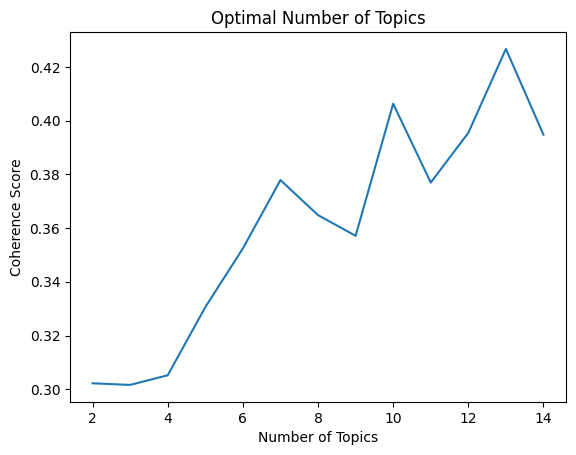

Topic 1: ['say', 'country', 'world', 'year', 'u', 'prison', 'putin', 'old', 'president', 'social']
Topic 2: ['trump', 'russian', 'korea', 'u', 'say', 'north', 'call', 'donald', 'mueller', 'president']
Topic 3: ['russian', 'trump', 'ban', 'new', 'government', 'city', 'plan', 'plastic', 'end', 'country']
Topic 4: ['trump', 'u', 'russia', 'leader', 'korean', 'found', 'war', 'south', 'norway', 'million']
Topic 5: ['russian', 'first', 'year', 'new', 'say', 'ban', '000', 'government', 'russia', 'ocean']
Topic 6: ['trump', 'say', 'russian', 'south', 'tax', 'korea', 'country', 'woman', 'group', 'german']
Topic 7: ['trump', 'u', 'russia', 'world', 'year', 'million', 'china', 'say', 'first', 'new']
Topic 8: ['say', 'trump', 'china', '000', 'russian', 'first', 'firm', 'u', 'russia', 'country']
Topic 9: ['trump', 'time', 'year', 'child', 'woman', 'first', 'korea', 'world', 'said', 'country']
Topic 10: ['year', 'world', 'u', 'people', 'new', 'say', '000', 'trump', 'russian', 'million']
Topic 11: ['

In [33]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re

# Ensure NLTK stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset with specified encoding
# Replace 'your_dataset.csv' with the path to your file
df = pd.read_csv('/content/priii.csv', encoding='ISO-8859-1')
documents = df['text'].dropna().tolist()

# Preprocess the documents
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase, remove punctuation, and tokenize
    text = re.sub(r'\W', ' ', str(text).lower())
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Create a dictionary and corpus needed for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Function to calculate coherence score for various numbers of topics
def calculate_coherence_values(corpus, dictionary, texts, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Determine optimal number of topics by coherence score
start, limit, step = 2, 15, 1
model_list, coherence_values = calculate_coherence_values(corpus=corpus, dictionary=dictionary, texts=processed_docs, start=start, limit=limit, step=step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics")
plt.show()

# Select the model with the highest coherence score
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
optimal_model = model_list[coherence_values.index(max(coherence_values))]

# Display topics and summarize them
topics = optimal_model.show_topics(num_topics=optimal_num_topics, num_words=10, formatted=False)
for idx, topic in topics:
    print(f"Topic {idx+1}: {[word for word, _ in topic]}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


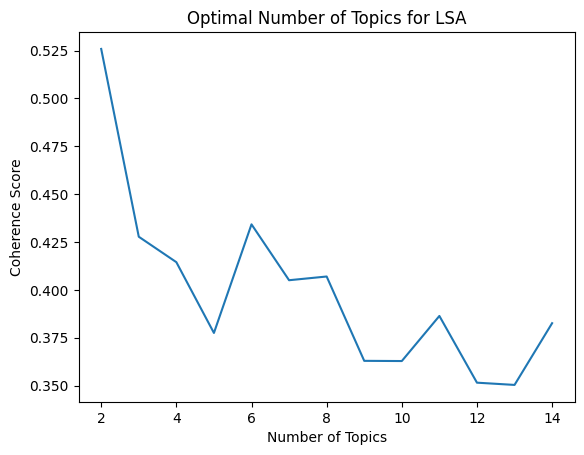

Optimal number of topics: 2

Topic 1: ['trump', 'korea', 'russian', 'say', 'north', 'russia', 'south', 'donald', 'country', 'year']
Topic 2: ['korea', 'north', 'south', 'talk', 'korean', 'olympics', 'un', 'kim', 'jong', 'call']


In [34]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re

# Ensure NLTK stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset with specified encoding
df = pd.read_csv('/content/priii.csv', encoding='ISO-8859-1')
documents = df['text'].dropna().tolist()

# Preprocess the documents
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase, remove punctuation, and tokenize
    text = re.sub(r'\W', ' ', str(text).lower())
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and corpus for coherence score calculation
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
texts = [' '.join(doc) for doc in processed_docs]  # Join tokens back for TF-IDF processing

# Convert preprocessed documents to TF-IDF representation
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(texts)

# Function to calculate coherence score for various numbers of topics
def calculate_coherence_values(dictionary, corpus, texts, X_tfidf, start=2, limit=15, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Perform LSA using TruncatedSVD
        lsa_model = TruncatedSVD(n_components=num_topics, random_state=42)
        lsa_model.fit(X_tfidf)
        model_list.append(lsa_model)

        # Transform documents to LSA space
        topics = []
        for i, comp in enumerate(lsa_model.components_):
            terms = [vectorizer.get_feature_names_out()[i] for i in comp.argsort()[:-11:-1]]
            topics.append(terms)

        # Calculate coherence score
        coherencemodel = CoherenceModel(topics=topics, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Determine optimal number of topics by coherence score
start, limit, step = 2, 15, 1
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_docs, X_tfidf=X_tfidf, start=start, limit=limit, step=step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for LSA")
plt.show()

# Select the model with the highest coherence score
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
optimal_model = model_list[coherence_values.index(max(coherence_values))]

# Display topics and summarize them
print(f"Optimal number of topics: {optimal_num_topics}\n")
for idx, comp in enumerate(optimal_model.components_):
    terms = [vectorizer.get_feature_names_out()[i] for i in comp.argsort()[:-11:-1]]
    print(f"Topic {idx+1}: {terms}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-11-04 02:33:44,525 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:34:00,385 - BERTopic - Embedding - Completed ✓
2024-11-04 02:34:00,391 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:34:04,749 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:34:04,753 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:34:05,022 - BERTopic - Cluster - Completed ✓
2024-11-04 02:34:05,029 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:34:05,136 - BERTopic - Representation - Completed ✓
2024-11-04 02:34:06,377 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:34:22,391 - BERTopic - Embedding - Completed ✓
2024-11-04 02:34:22,393 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:34:25,007 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:34:25,009 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:34:25,111 - BERTopic - Cluster - Completed ✓
2024-11-04 02:34:25,118 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:34:25,190 - BERTopic - Representation - Completed ✓
2024-11-04 02:34:25,736 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:34:41,911 - BERTopic - Embedding - Completed ✓
2024-11-04 02:34:41,914 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:34:45,326 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:34:45,331 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:34:45,475 - BERTopic - Cluster - Completed ✓
2024-11-04 02:34:45,484 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:34:45,556 - BERTopic - Representation - Completed ✓
2024-11-04 02:34:45,967 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:35:01,635 - BERTopic - Embedding - Completed ✓
2024-11-04 02:35:01,638 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:35:04,214 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:35:04,216 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:35:04,292 - BERTopic - Cluster - Completed ✓
2024-11-04 02:35:04,299 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:35:04,334 - BERTopic - Representation - Completed ✓
2024-11-04 02:35:04,449 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:35:20,636 - BERTopic - Embedding - Completed ✓
2024-11-04 02:35:20,641 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:35:23,271 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:35:23,274 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:35:23,347 - BERTopic - Cluster - Completed ✓
2024-11-04 02:35:23,354 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:35:23,397 - BERTopic - Representation - Completed ✓
2024-11-04 02:35:23,612 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:35:39,597 - BERTopic - Embedding - Completed ✓
2024-11-04 02:35:39,599 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:35:42,881 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:35:42,887 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:35:43,017 - BERTopic - Cluster - Completed ✓
2024-11-04 02:35:43,024 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:35:43,081 - BERTopic - Representation - Completed ✓
2024-11-04 02:35:43,230 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:35:59,100 - BERTopic - Embedding - Completed ✓
2024-11-04 02:35:59,103 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:36:01,689 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:36:01,692 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:36:01,776 - BERTopic - Cluster - Completed ✓
2024-11-04 02:36:01,782 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:36:01,818 - BERTopic - Representation - Completed ✓
2024-11-04 02:36:01,923 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:36:17,913 - BERTopic - Embedding - Completed ✓
2024-11-04 02:36:17,916 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:36:21,229 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:36:21,238 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:36:21,359 - BERTopic - Cluster - Completed ✓
2024-11-04 02:36:21,369 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:36:21,435 - BERTopic - Representation - Completed ✓
2024-11-04 02:36:21,625 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2024-11-04 02:36:37,673 - BERTopic - Embedding - Completed ✓
2024-11-04 02:36:37,674 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-04 02:36:41,484 - BERTopic - Dimensionality - Completed ✓
2024-11-04 02:36:41,487 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-04 02:36:41,627 - BERTopic - Cluster - Completed ✓
2024-11-04 02:36:41,634 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-04 02:36:41,704 - BERTopic - Representation - Completed ✓


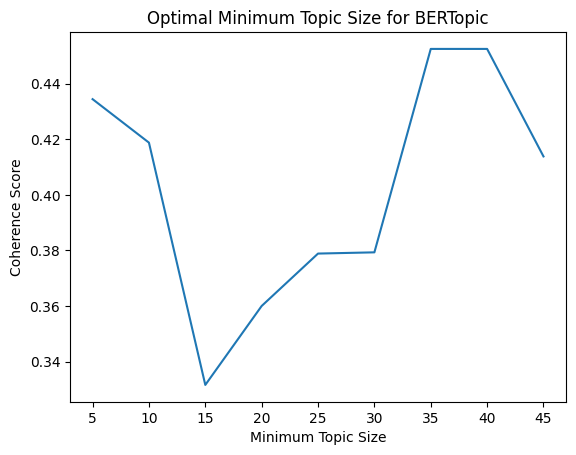

Optimal Model Topics:
Topic -1: ['doping', 'puerto', 'earthquake', 'russian', 'rico', 'winter', 'hawaii', 'magnitude', 'missile', 'alert']
Topic 0: ['trump', 'year', 'russian', 'say', 'new', 'russia', 'world', 'country', 'million', 'first']
Topic 1: ['korea', 'north', 'south', 'korean', 'olympics', 'penny', 'un', 'kim', 'jong', 'talk']


In [36]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset with specified encoding
df = pd.read_csv('/content/priii.csv', encoding='ISO-8859-1')
documents = df['text'].dropna().tolist()

# Preprocess the documents
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text).lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return tokens

processed_docs = [preprocess_text(doc) for doc in documents]

# Create dictionary and corpus for coherence score calculation
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
texts = [' '.join(doc) for doc in processed_docs]  # Join tokens back for BERTopic processing

# Function to calculate coherence score for various settings
def calculate_coherence_values(dictionary, corpus, texts, start=5, limit=50, step=5):
    coherence_values = []
    model_list = []
    for min_topic_size in range(start, limit, step):
        # Initialize BERTopic with specified min_topic_size
        topic_model = BERTopic(min_topic_size=min_topic_size, calculate_probabilities=True, verbose=True)
        topics, _ = topic_model.fit_transform(texts)

        # Get topic representations for coherence calculation
        topic_words = topic_model.get_topics()
        topics_coherence = [[word[0] for word in topic_words[topic]] for topic in topic_words]

        # Calculate coherence score
        coherence_model = CoherenceModel(topics=topics_coherence, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
        model_list.append(topic_model)

    return model_list, coherence_values

# Determine optimal number of topics by coherence score
start, limit, step = 5, 50, 5
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Minimum Topic Size")
plt.ylabel("Coherence Score")
plt.title("Optimal Minimum Topic Size for BERTopic")
plt.show()

# Select the model with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_index]

# Display and summarize the topics
print("Optimal Model Topics:")
topics = optimal_model.get_topics()
for topic_num, topic_words in topics.items():
    print(f"Topic {topic_num}: {[word for word, _ in topic_words]}")


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


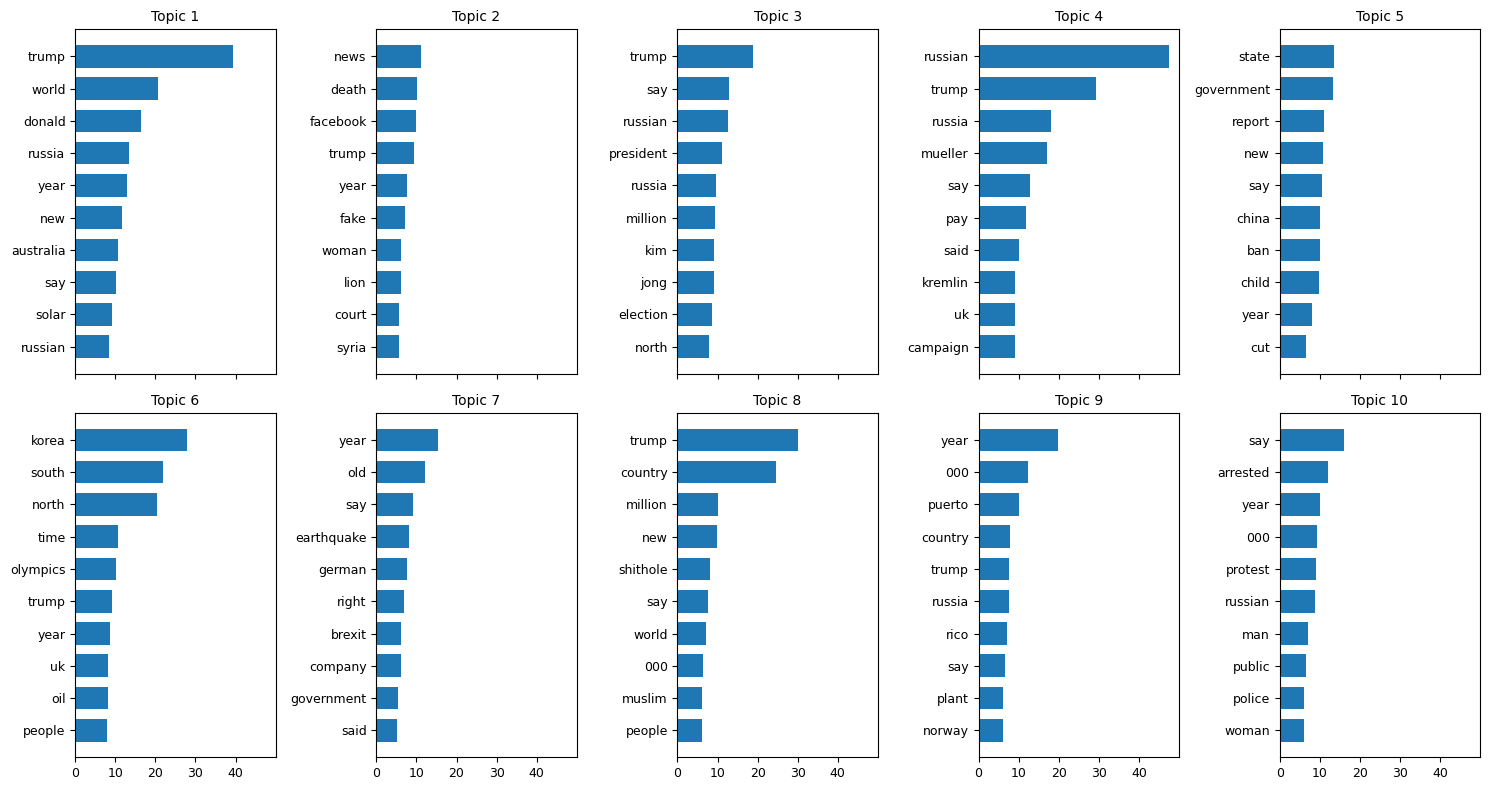

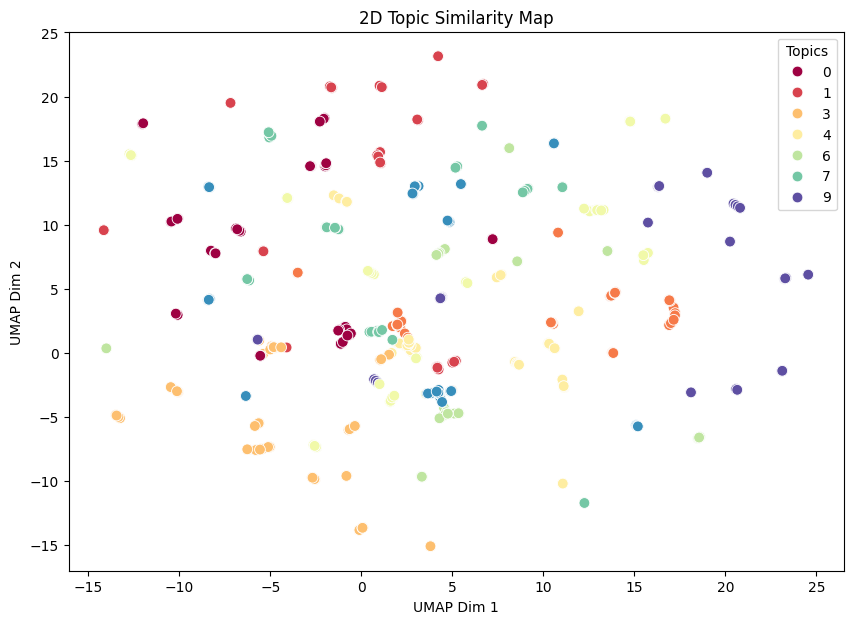

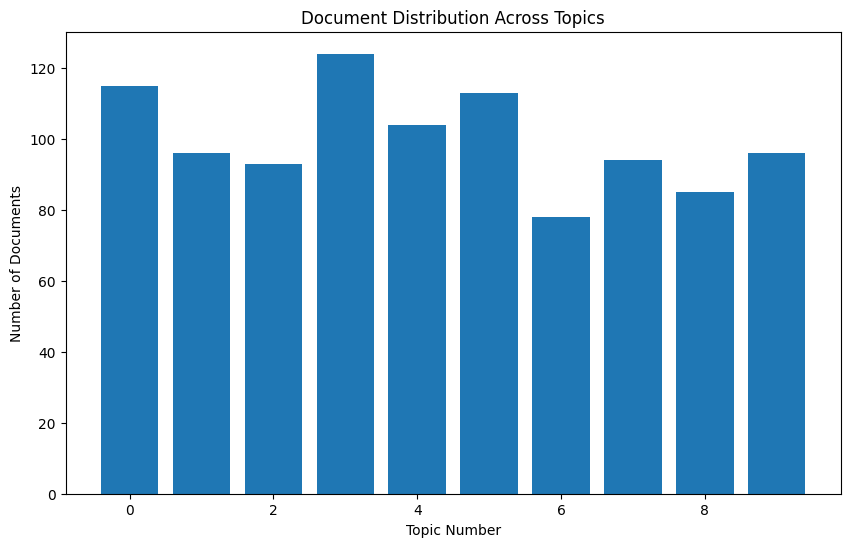

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim import corpora
from gensim.models import CoherenceModel
from collections import Counter
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure NLTK stopwords and lemmatizer are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset with specified encoding
df = pd.read_csv('/content/priii.csv', encoding='ISO-8859-1')
documents = df['text'].dropna().tolist()

# Preprocess the documents
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text).lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return ' '.join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]

# Vectorize the documents
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(doc_term_matrix)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# 1. Visualization of Top Words in Topics
def plot_top_words(lda_model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx+1}", fontdict={"fontsize": 10})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=9)
    plt.tight_layout()
    plt.show()

plot_top_words(lda_model, feature_names)

# 2. Topic Similarity Map using UMAP
from umap import UMAP

# Get document-topic distribution
doc_topic_distr = lda_model.transform(doc_term_matrix)

# Reduce dimensions with UMAP
umap_model = UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(doc_topic_distr)

# Plot UMAP embedding
plt.figure(figsize=(10, 7))
sns.scatterplot(x=umap_embedding[:, 0], y=umap_embedding[:, 1], hue=np.argmax(doc_topic_distr, axis=1), palette="Spectral", s=60)
plt.title("2D Topic Similarity Map")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.legend(title="Topics")
plt.show()

# 3. Document Distribution Across Topics
topic_counts = Counter(np.argmax(doc_topic_distr, axis=1))
topic_numbers = list(topic_counts.keys())
document_counts = list(topic_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(topic_numbers, document_counts)
plt.xlabel("Topic Number")
plt.ylabel("Number of Documents")
plt.title("Document Distribution Across Topics")
plt.show()


In [45]:
'''
The most crucial terms for every subject are displayed in this graphic along with their weights. Every subject is depicted as a bar chart, with words on the x-axis and the significance of each word in the topic (typically determined by word frequency or importance score) on the y-axis.

How to Interupt:

Stronger associations between the word and the issue are indicated by higher values on the y-axis.
It is easier to find overlaps or distinguish related topics when top words from different categories are compared.
Based on each topic's top words, this picture provides a sense of its "theme" or main subject matter.

2) Topic Similarity Map using UMAP
In order to project subjects into 2D space, UMAP is applied to the document-topic distribution. This results in a scatterplot that displays topic clusters and similarity.

3) Document Distribution Across topics
By displaying the number of documents that belong to each topic, this bar chart provides information about which topics are more prevalent throughout the dataset.
'''

'\nThe most crucial terms for every subject are displayed in this graphic along with their weights. Every subject is depicted as a bar chart, with words on the x-axis and the significance of each word in the topic (typically determined by word frequency or importance score) on the y-axis.\n\nHow to Interupt:\n\nStronger associations between the word and the issue are indicated by higher values on the y-axis.\nIt is easier to find overlaps or distinguish related topics when top words from different categories are compared.\nBased on each topic\'s top words, this picture provides a sense of its "theme" or main subject matter.\n'

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
To compare any topics in topic modelling these are few factors that needs to be considered in general. The below factors are chosen based my experience working on this exercise.

Coherence Score: This measure indicates topic interpretation and similarities in the semantic structure of most occurred words of a topic. A high coherence score implies that the topics are strongly
aligned with each other.
Topic Interpretation: This measure indicates if the topics generated by each topic modelling are coherent and easily interpretable. Can these topic models accurately suumarize based on the
best words associated with each topic.
Scalable: This measure indicates if the topic models can handle datasets effectively and efficiently.

From the above mentioned measures, when we consider coherence score and topic interpretability, BerTopic is more efficient than the other two topic models (namely LDA and LSA). But when
considering scalability BerTopic appears to be less efficient than LDA and LSA models as it has taken significant amount of time when compared to the other two models to run the same
dataset.
'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
while working on this exercise,

Learning Experience: During this exercise, I have learned about the steps that are  involved in implementation of LDA, LSA, and BerTopic for topic modeling. Before implementation of these
algorithms I need to understand about the  various preprocessing steps that are needed to run on  data.  I used for preprocessing the data: Removing
emails, next line charaters, stop words, biagram, triagrams, lemmentization and stemming. I have also learned about the importance of coherence score which can help understand the optimal
number of topics required for a dataset. I have also visualized the optimal topics chosen using LDA model which helped me understand more about these topics and topic modelling in general.

Challenges Encountered:While working on this exercise, I faced issues in  implementing the lda2vec model even though I have referred to various sources . For the BerTopic model the notebook
which was provided didn't have theory/explanation on how to use coherence score to identify optimal topics for a dataset.




'''